In this notebok im going to calculate the LD across my chromosme 1 segment
for one of the populations simulated with slim 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 
import os

import allel
import subprocess

In [23]:
# Load the genotype data from a VCF file 
# will start calculating ld for pop0
vcf = allel.read_vcf('vcf_slim/subp0.vcf')
genotypes = allel.GenotypeArray(vcf['calldata/GT'])

In [24]:
gn = genotypes.to_n_alt(fill=-1)

r = allel.rogers_huff_r(gn)

from scipy.spatial.distance import squareform
sq = squareform(r ** 2)

In [27]:
pd.DataFrame(sq)

0         1         2         3         4         5         6     \
0     0.000000  0.179626  0.734500  0.005098  0.005412  0.033708  0.111230   
1     0.179626  0.000000  0.244406  0.026539  0.028261  0.184785  0.033970   
2     0.734500  0.244406  0.000000  0.006917  0.007343  0.045733  0.150911   
3     0.005098  0.026539  0.006917  0.000000  0.000728  0.004531  0.000399   
4     0.005412  0.028261  0.007343  0.000728  0.000000  0.003619  0.014227   
...        ...       ...       ...       ...       ...       ...       ...   
4967  0.001088  0.005220  0.001476  0.000146  0.000155  0.000967  0.001668   
4968  0.007392  0.000407  0.010029  0.240914  0.001055  0.006569  0.008399   
4969  0.007392  0.000407  0.010029  0.240914  0.001055  0.006569  0.008399   
4970  0.015563  0.074664  0.021116  0.002092  0.002221  0.013832  0.045641   
4971  0.007392  0.000407  0.010029  0.240914  0.001055  0.006569  0.008399   

          7         8         9     ...      4962      4963      4964  4965  \
0     0.036419  0.001967  0.027576  ...  0.009819  0.001088  0.042257   NaN   
1     0.199993  0.011076  0.127814  ...  0.055286  0.005220  0.162779   NaN   
2     0.049411  0.002669  0.037414  ...  0.013323  0.001476  0.061319   NaN   
3     0.012231  0.402189  0.002591  ...  0.001320  0.000146  0.000436   NaN   
4     0.003987  0.000281  0.003935  ...  0.001401  0.000155  0.024429   NaN   
...        ...       ...       ...  ...       ...       ...       ...   ...   
4967  0.001045  0.000056  0.000026  ...  0.000282  1.000000  0.003352   NaN   
4968  0.007098  0.000383  0.003152  ...  0.001914  0.000212  0.001181   NaN   
4969  0.007098  0.000383  0.003152  ...  0.001914  0.000212  0.001181   NaN   
4970  0.014944  0.000807  0.011315  ...  0.004029  0.000446  0.086584   NaN   
4971  0.007098  0.000383  0.003152  ...  0.001914  0.000212  0.001181   NaN   

          4966      4967      4968      4969      4970      4971  
0     0.011285  0.001088  0.007392  0.007392  0.015563  0.007392  
1     0.043333  0.005220  0.000407  0.000407  0.074664  0.000407  
2     0.046975  0.001476  0.010029  0.010029  0.021116  0.010029  
3     0.009849  0.000146  0.240914  0.240914  0.002092  0.240914  
4     0.012170  0.000155  0.001055  0.001055  0.002221  0.001055  
...        ...       ...       ...       ...       ...       ...  
4967  0.009688  0.000000  0.000212  0.000212  0.000446  0.000212  
4968  0.002985  0.000212  0.000000  1.000000  0.003033  1.000000  
4969  0.002985  0.000212  1.000000  0.000000  0.003033  1.000000  
4970  0.034994  0.000446  0.003033  0.003033  0.000000  0.003033  
4971  0.002985  0.000212  1.000000  1.000000  0.003033  0.000000  

[4972 rows x 4972 columns]

<AxesSubplot:>

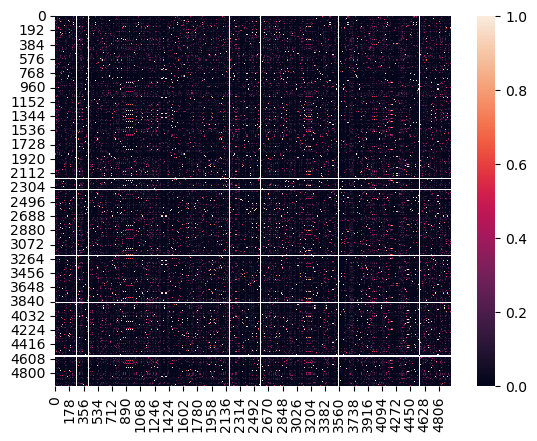

In [25]:
sns.heatmap(sq)

Two things that are also suggested before calculating ld is
1) only consider biallelic variants, since ld is calculated between pairs of alleles at different loci, if a locus has more than 2 alleles, there would be more possible combinations of alleles 
but in this case we already only have biallelic variants

2) The other thing that we are supposed to filter is the MAF, filtering MAF is based on the idea that they might be seq errors and because it would decrease the power fo ld calcualtion:

ld calculation is based on the correlation fo 2 variants across samples
if you are using a variant that has a very low frequency it will be very rare in the population, that means that is will be very dificult to detect the association between this rare allele and other snps. With fewer observations it becomes harder to distinguish between true associations and random fluctuations in the data, which decreases the statistical power of the data 

In [4]:
# now we are supposed to filter MAF, minor allele frequency 
genotypes.count_alleles().to_frequencies()[:,1]

array([0.838, 0.48 , 0.792, ..., 0.965, 0.074, 0.965])

[Text(0.5, 1.0, 'Site Frequency Spectrum \n Alt Allele')]

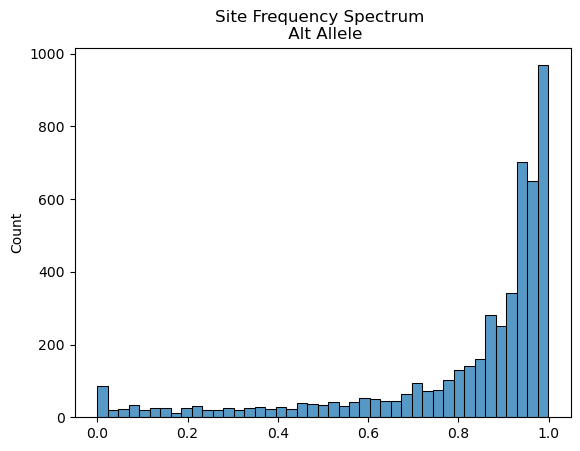

In [54]:
sns.histplot(genotypes.count_alleles().to_frequencies()[:,0]).set(title='Site Frequency Spectrum \n Alt Allele')

[Text(0.5, 1.0, 'Site Frequency Spectrum \n Ref Allele')]

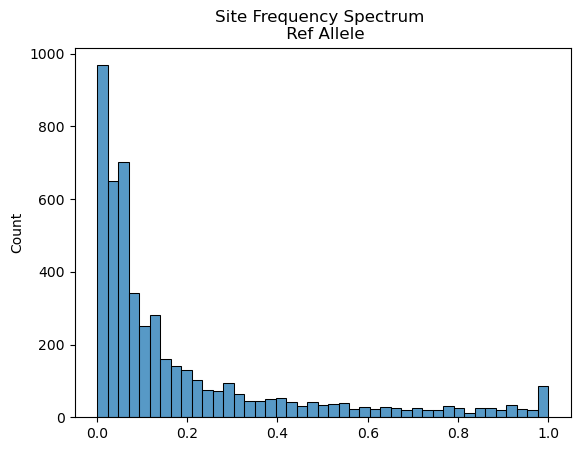

In [55]:
sns.histplot(genotypes.count_alleles().to_frequencies()[:,1]).set(title='Site Frequency Spectrum \n Ref Allele')

In [5]:
# Filter for minor allele frequency (MAF)
maf = genotypes.count_alleles().to_frequencies()
is_common = (maf > 0.05) & (maf < 0.95)

In [6]:
mask = np.all(is_common, axis=1)

In [7]:
genotypes_filtered = genotypes[mask]

[Text(0.5, 1.0, 'Site Frequency Spectrum \n Alternative Allele')]

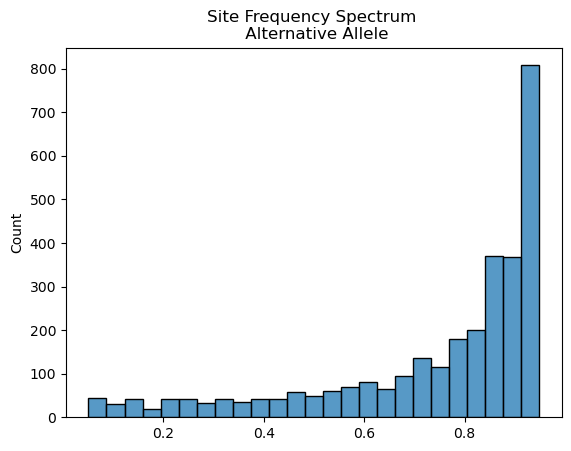

In [62]:
sns.histplot(genotypes_filtered.count_alleles().to_frequencies()[:,0]).set(title='Site Frequency Spectrum \n Alternative Allele')

In [63]:
genotypes_filtered

<GenotypeArray shape=(3068, 500, 2) dtype=int8>
0/0 1/1 0/0 1/1 1/1 ... 1/1 1/1 1/1 1/1 1/1
0/0 1/1 0/0 1/1 1/1 ... 1/1 1/1 1/1 0/0 1/1
0/0 1/1 0/0 1/1 1/1 ... 1/1 1/1 1/1 1/1 1/1
...
0/0 0/0 0/0 0/0 1/1 ... 0/0 0/0 0/0 1/1 0/0
1/1 0/0 1/1 0/0 0/0 ... 1/1 1/1 1/1 0/0 1/1
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 1/1 0/0

In [65]:
genotypes_filtered

<GenotypeArray shape=(3068, 500, 2) dtype=int8>
0/0 1/1 0/0 1/1 1/1 ... 1/1 1/1 1/1 1/1 1/1
0/0 1/1 0/0 1/1 1/1 ... 1/1 1/1 1/1 0/0 1/1
0/0 1/1 0/0 1/1 1/1 ... 1/1 1/1 1/1 1/1 1/1
...
0/0 0/0 0/0 0/0 1/1 ... 0/0 0/0 0/0 1/1 0/0
1/1 0/0 1/1 0/0 0/0 ... 1/1 1/1 1/1 0/0 1/1
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 1/1 0/0

In [8]:
#Transform each genotype call into the number of non-reference alleles.
n_alt = genotypes_filtered.to_n_alt(fill=-1)

In [9]:
# Calculate pairwise LD coefficients (r^2 and D')
ld_r2 = allel.stats.ld.rogers_huff_r(n_alt)
#ld_dprime = allel.stats.ld.rogers_huff_d(n_alt)

# Convert the LD arrays to square matrices
#ld_r2_matrix = allel.stats.misc.squareform(n_alt)
#ld_dprime_matrix = allel.stats.misc.squareform(n_alt)

In [71]:
ld_r2

array([ 0.42382264,  0.8570298 ,  0.18359692, ..., -0.6327827 ,
        0.29425144, -0.1870672 ], dtype=float32)

In [12]:
allel.plot_pairwise_ld(ld_r2)

<AxesSubplot:>

In [20]:
pd.DataFrame(ld_r2)

0
0        0.423823
1        0.857030
2        0.183597
3        0.333511
4        0.190837
...           ...
4704773  0.555959
4704774 -0.102906
4704775 -0.632783
4704776  0.294251
4704777 -0.187067

[4704778 rows x 1 columns]

In [10]:
#ld_r2** 2  
from scipy.spatial.distance import squareform
sq = squareform(ld_r2 ** 2)

In [21]:
pd.DataFrame(sq)

0         1         2         3         4         5         6     \
0     0.000000  0.179626  0.734500  0.033708  0.111230  0.036419  0.027576   
1     0.179626  0.000000  0.244406  0.184785  0.033970  0.199993  0.127814   
2     0.734500  0.244406  0.000000  0.045733  0.150911  0.049411  0.037414   
3     0.033708  0.184785  0.045733  0.000000  0.303075  0.923077  0.023142   
4     0.111230  0.033970  0.150911  0.303075  0.000000  0.327911  0.246924   
...        ...       ...       ...       ...       ...       ...       ...   
3063  0.047266  0.006913  0.019043  0.046992  0.075559  0.050772  0.035515   
3064  0.024452  0.142904  0.033578  0.022936  0.073887  0.024780  0.018763   
3065  0.042257  0.162779  0.061319  0.036879  0.003894  0.024868  0.146191   
3066  0.011285  0.043333  0.046975  0.072359  0.042250  0.078415  0.058674   
3067  0.015563  0.074664  0.021116  0.013832  0.045641  0.014944  0.011315   

          7         8         9     ...      3058      3059      3060  \
0     0.013331  0.015563  0.041172  ...  0.014053  0.008926  0.016935   
1     0.072749  0.074664  0.146599  ...  0.071477  0.108461  0.055018   
2     0.018087  0.021116  0.029127  ...  0.019446  0.000074  0.003659   
3     0.009359  0.013832  0.035146  ...  0.013633  0.074412  0.066591   
4     0.119421  0.045641  0.256615  ...  0.044985  0.018800  0.003019   
...        ...       ...       ...  ...       ...       ...       ...   
3063  0.015852  0.021697  0.004310  ...  0.021385  0.526416  0.023609   
3064  0.007853  0.010590  0.028014  ...  0.010437  0.292650  0.011523   
3065  0.063096  0.086584  0.178337  ...  0.080807  0.324958  0.094215   
3066  0.150656  0.034994  0.069359  ...  0.034491  0.504172  0.038078   
3067  0.005470  1.000000  0.016894  ...  0.006294  0.036754  0.006949   

          3061      3062      3063      3064      3065      3066      3067  
0     0.031361  0.142669  0.047266  0.024452  0.042257  0.011285  0.015563  
1     0.000185  0.094102  0.006913  0.142904  0.162779  0.043333  0.074664  
2     0.042968  0.380513  0.019043  0.033578  0.061319  0.046975  0.021116  
3     0.160989  0.017433  0.046992  0.022936  0.036879  0.072359  0.013832  
4     0.012841  0.057524  0.075559  0.073887  0.003894  0.042250  0.045641  
...        ...       ...       ...       ...       ...       ...       ...  
3063  0.045684  0.027346  0.000000  0.492136  0.149528  0.453127  0.021697  
3064  0.022297  0.013347  0.492136  0.000000  0.124079  0.309090  0.010590  
3065  0.000175  0.093843  0.149528  0.124079  0.000000  0.400414  0.086584  
3066  0.070275  0.004357  0.453127  0.309090  0.400414  0.000000  0.034994  
3067  0.013447  0.008049  0.021697  0.010590  0.086584  0.034994  0.000000  

[3068 rows x 3068 columns]

<AxesSubplot:>

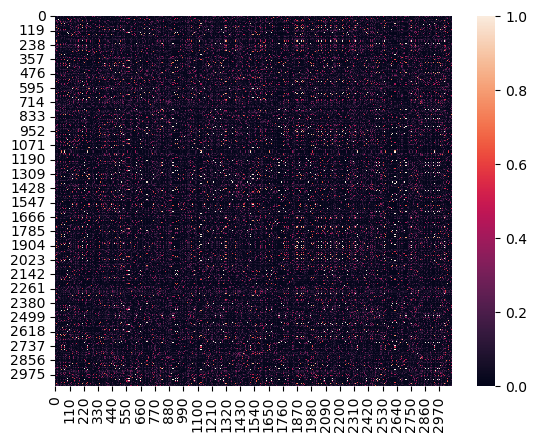

In [22]:
sns.heatmap(sq)

In [72]:
allel.rogers_huff_r(n_alt)

array([ 0.42382264,  0.8570298 ,  0.18359692, ..., -0.6327827 ,
        0.29425144, -0.1870672 ], dtype=float32)

In [77]:
allel.plot_pairwise_ld(sq)

<AxesSubplot:>